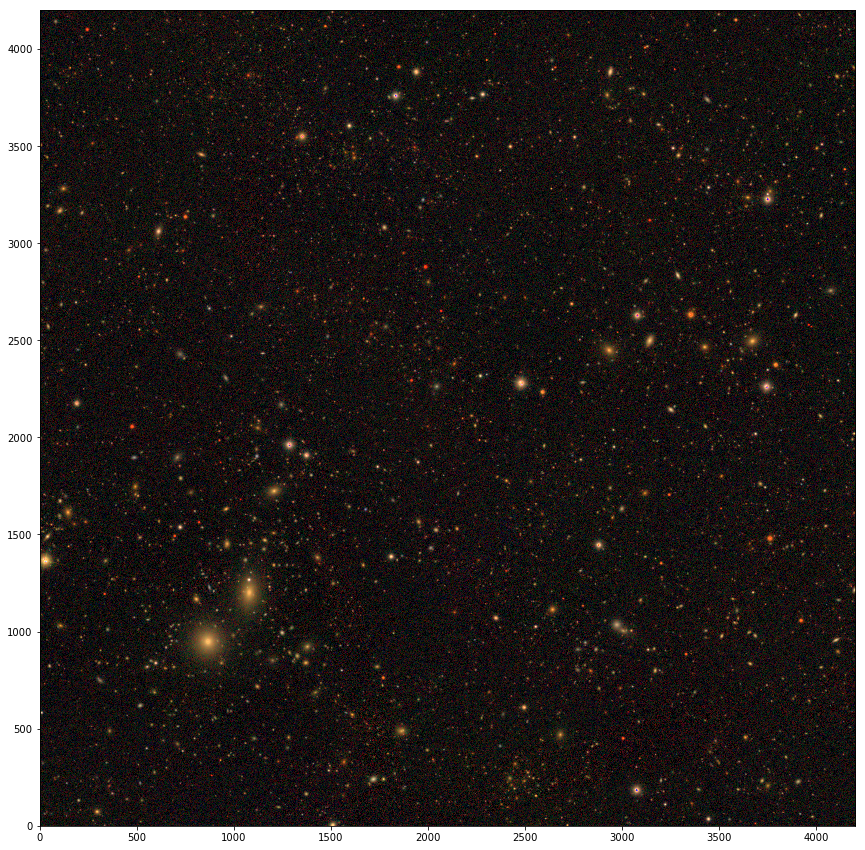

<module 'matplotlib.pyplot' from '/sps/lsst/software/lsst_distrib/w_2018_08/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [68]:
from matplotlib import pylab as plt
from matplotlib.colors import LogNorm

import lsst.daf.persistence as dp
import lsst.afw.display as display
import lsst.afw.display.rgb as rgb

# get a butler

butler = dp.Butler("/sps/lsst/dataproducts/desc/DC2/Run1.1-test/201811000/work/201811024/output")
dataId = {'tract':5064, 'patch':'5,1'}

bandpass_color_map = {'green':'r', 'red':'i', 'blue':'g'}

# get ref catalog
refs = {}
exposures = {}
for bandpass in bandpass_color_map.values():
    dataId['filter'] = bandpass
#    refs[bandpass] = butler.get('deepCoadd_ref', dataId=dataId)
    exposures[bandpass] = butler.get('deepCoadd', dataId=dataId)
    
rgb_im = rgb.makeRGB(*(exposures[bandpass_color_map[color]].getMaskedImage().getImage()
                       for color in ('red', 'green', 'blue')), Q=8, minimum = -0.1, dataRange=1.5, 
                       saturatedPixelValue=100,
                       xSize=None, ySize=None)
#rgb_im = rgb.makeRGB(*(exposures[bandpass_color_map[color]].getMaskedImage().getImage()
#                       for color in ('red', 'green', 'blue')), Q=8, dataRange=0.8, saturatedPixelValue=130)

#item = exposures.popitem()
#dims = item[1].getDimensions()
#exposures.update((item,))

#fig = plt.figure(figsize=(10,10))
#plt.imshow(rgb_im, interpolation='nearest', norm=LogNorm(vmin=0.01, vmax=10))
# Uncomment the following line to plot the detections
#plt.scatter(refs['g'].getX(), dims[1]-refs['g'].getY(), edgecolors='none', alpha=0.3)
#plt.xlim(0, dims[0])
#plt.ylim(dims[1], 0)
#plt.show()

fig = plt.figure(figsize=(15,15))
rgb.displayRGB(rgb_im)

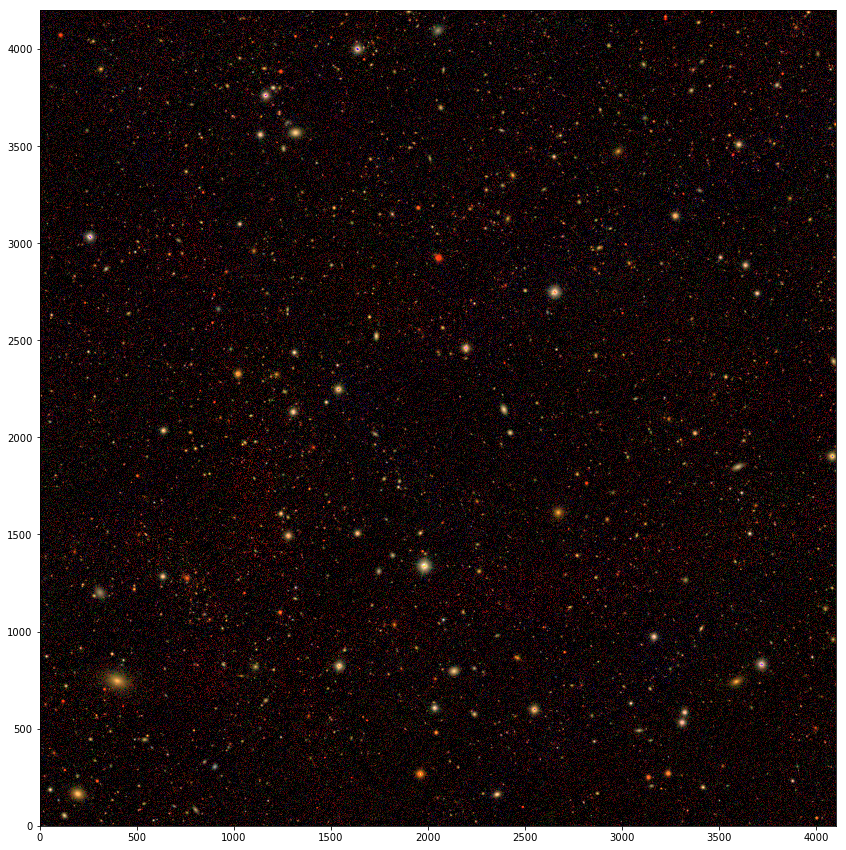

<module 'matplotlib.pyplot' from '/sps/lsst/software/lsst_distrib/w_2018_08/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [28]:
fig = plt.figure(figsize=(15,15))
rgb_im = rgb.makeRGB(*(exposures[bandpass_color_map[color]].getMaskedImage().getImage()
                       for color in ('red', 'green', 'blue')), Q=8, dataRange=1.0, 
                       xSize=None, ySize=None)
#saturatedPixelValue=130,
rgb.displayRGB(rgb_im)

In [25]:
minval = min(image_r.min(), image_g.min(), image_b.min())
maxval = max(image_r.max(), image_g.max(), image_b.max())

<module 'lsst.afw.display.rgb' from '/sps/lsst/software/lsst_distrib/w_2018_08/stack/miniconda3-4.3.21-10a4fa6/Linux64/afw/14.0-50-gd3fc20b3e/python/lsst/afw/display/rgb.py'>

In [69]:
array_r = exposures[bandpass_color_map['red']].getMaskedImage().getImage().array
array_g = exposures[bandpass_color_map['green']].getMaskedImage().getImage().array
array_b = exposures[bandpass_color_map['blue']].getMaskedImage().getImage().array
minVal = min(array_r.min(), array_g.min(), array_b.min())
maxVal = min(array_r.max(), array_g.max(), array_b.max())
print(minVal, maxVal)

-1.3628297 1091.5851


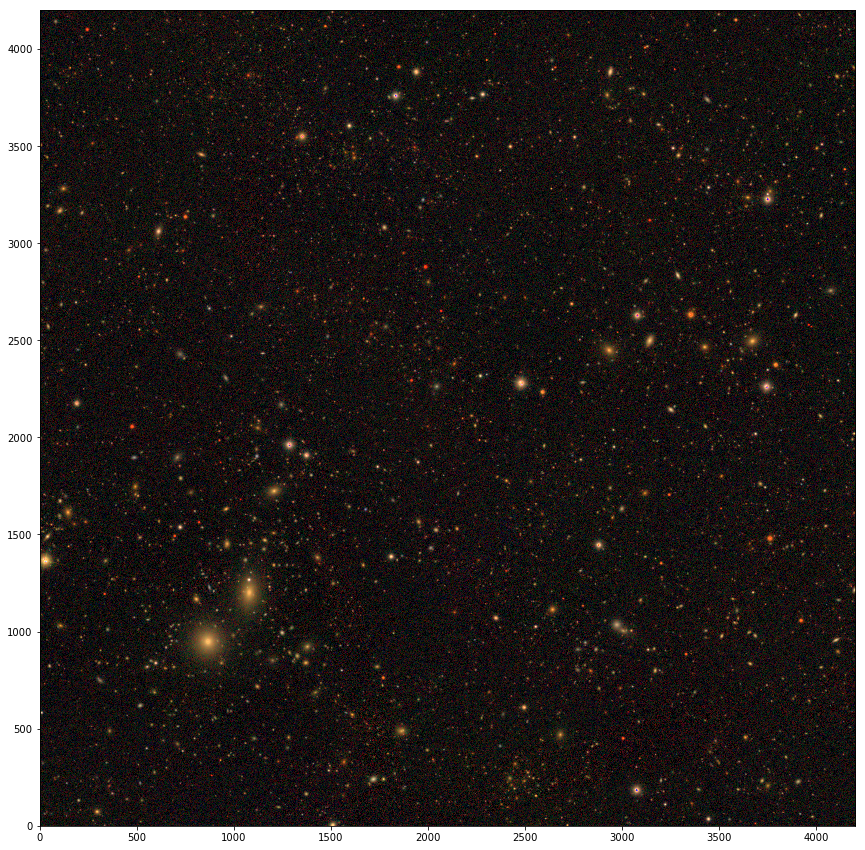

<module 'matplotlib.pyplot' from '/sps/lsst/software/lsst_distrib/w_2018_08/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [71]:
fig = plt.figure(figsize=(15,15))
rgb_im = rgb.makeRGB(*(exposures[bandpass_color_map[color]].getMaskedImage().getImage()
                       for color in ('red', 'green', 'blue')), Q=8, minimum = -0.1, dataRange=1.5, 
                       saturatedPixelValue=100,
                       xSize=None, ySize=None)
#saturatedPixelValue=130,
rgb.displayRGB(rgb_im)

In [72]:
fig.savefig("rgb_5064_51.png")